In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from kmeans_pytorch import kmeans, kmeans_predict

In [2]:
df = pd.read_csv('pyto/chap11/data/iris.csv')
df.info()
print('-------------------')
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
-------------------
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...     

In [3]:
data =pd.get_dummies(df,columns=['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,False,True
146,147,6.3,2.5,5.0,1.9,False,False,True
147,148,6.5,3.0,5.2,2.0,False,False,True
148,149,6.2,3.4,5.4,2.3,False,False,True


In [12]:
from sklearn.model_selection import train_test_split
x, y = train_test_split(data, test_size=0.3, random_state=131)

In [13]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled= scaler.fit(data).transform(x)
y_scaled= scaler.fit(y).transform(y)

In [15]:
x=torch.from_numpy(X_scaled)
y=torch.from_numpy(y_scaled)

In [16]:
print(x.size())
print(y.size())
print(x)

torch.Size([105, 8])
torch.Size([45, 8])
tensor([[ 6.1200e-01, -5.2506e-02, -8.1917e-01,  7.6276e-01,  9.2206e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [ 1.7321e-01, -5.2506e-02, -8.1917e-01,  8.0370e-02,  1.7530e-03,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 5.4272e-01, -9.0068e-01, -1.2820e+00, -4.3142e-01, -1.2972e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 2.8868e-01,  5.5333e-01, -1.7448e+00,  3.6470e-01,  1.3323e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [-5.6582e-01,  1.4015e+00,  3.3785e-01,  5.3530e-01,  2.6470e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [-1.4203e+00, -1.8700e+00, -1.2496e-01, -1.5119e+00, -1.4444e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-1.3510e+00, -5.3718e-01,  1.9577e+00, -1.3981e+00, -1.0500e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-2.6559e-01,  3.1100e-01, -3.5636e-01,  5.3530e-01,  2.6470e-01,
         -7.0711e-01,  1

In [17]:
num_clusters = 3
cluster_ids_x, cluster_centers = kmeans(X=x, num_clusters=num_clusters, distance='euclidean', device=device)

running k-means on cuda:0..


[running kmeans]: 2it [00:00, 249.97it/s, center_shift=0.000000, iteration=2, tol=0.000100]


In [18]:
print(cluster_ids_x)
print(cluster_centers)

tensor([2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2,
        1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1,
        0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0,
        0, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2,
        2, 0, 2, 0, 0, 0, 2, 1, 2])
tensor([[-1.1731, -1.0349,  0.7631, -1.3121, -1.2526,  1.4142, -0.7071, -0.7071],
        [-0.0028,  0.0457, -0.6816,  0.2648,  0.1474, -0.7071,  1.4142, -0.7071],
        [ 1.1655,  0.9950, -0.1697,  1.0526,  1.1172, -0.7071, -0.7071,  1.4142]])


In [19]:
cluster_ids_y = kmeans_predict(y, cluster_centers, 'euclidean', device=device)

predicting on cuda:0..


In [20]:
print(cluster_ids_y)

tensor([0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2,
        1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0])


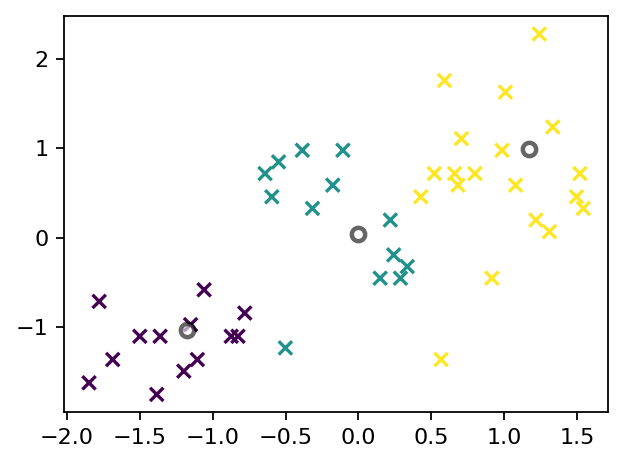

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='viridis',marker='x')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],c='white',alpha=0.6,edgecolors='black',linewidths=2)

plt.tight_layout()
plt.show()